In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def gamma_correction(img, c, gamma):
    img = img.astype(np.float32)
    img = c * img ** gamma

    # Normalize the image
    img = img / np.max(img) * 255

    return img.astype(np.uint8)

# Image Enhancements with Gamma correction

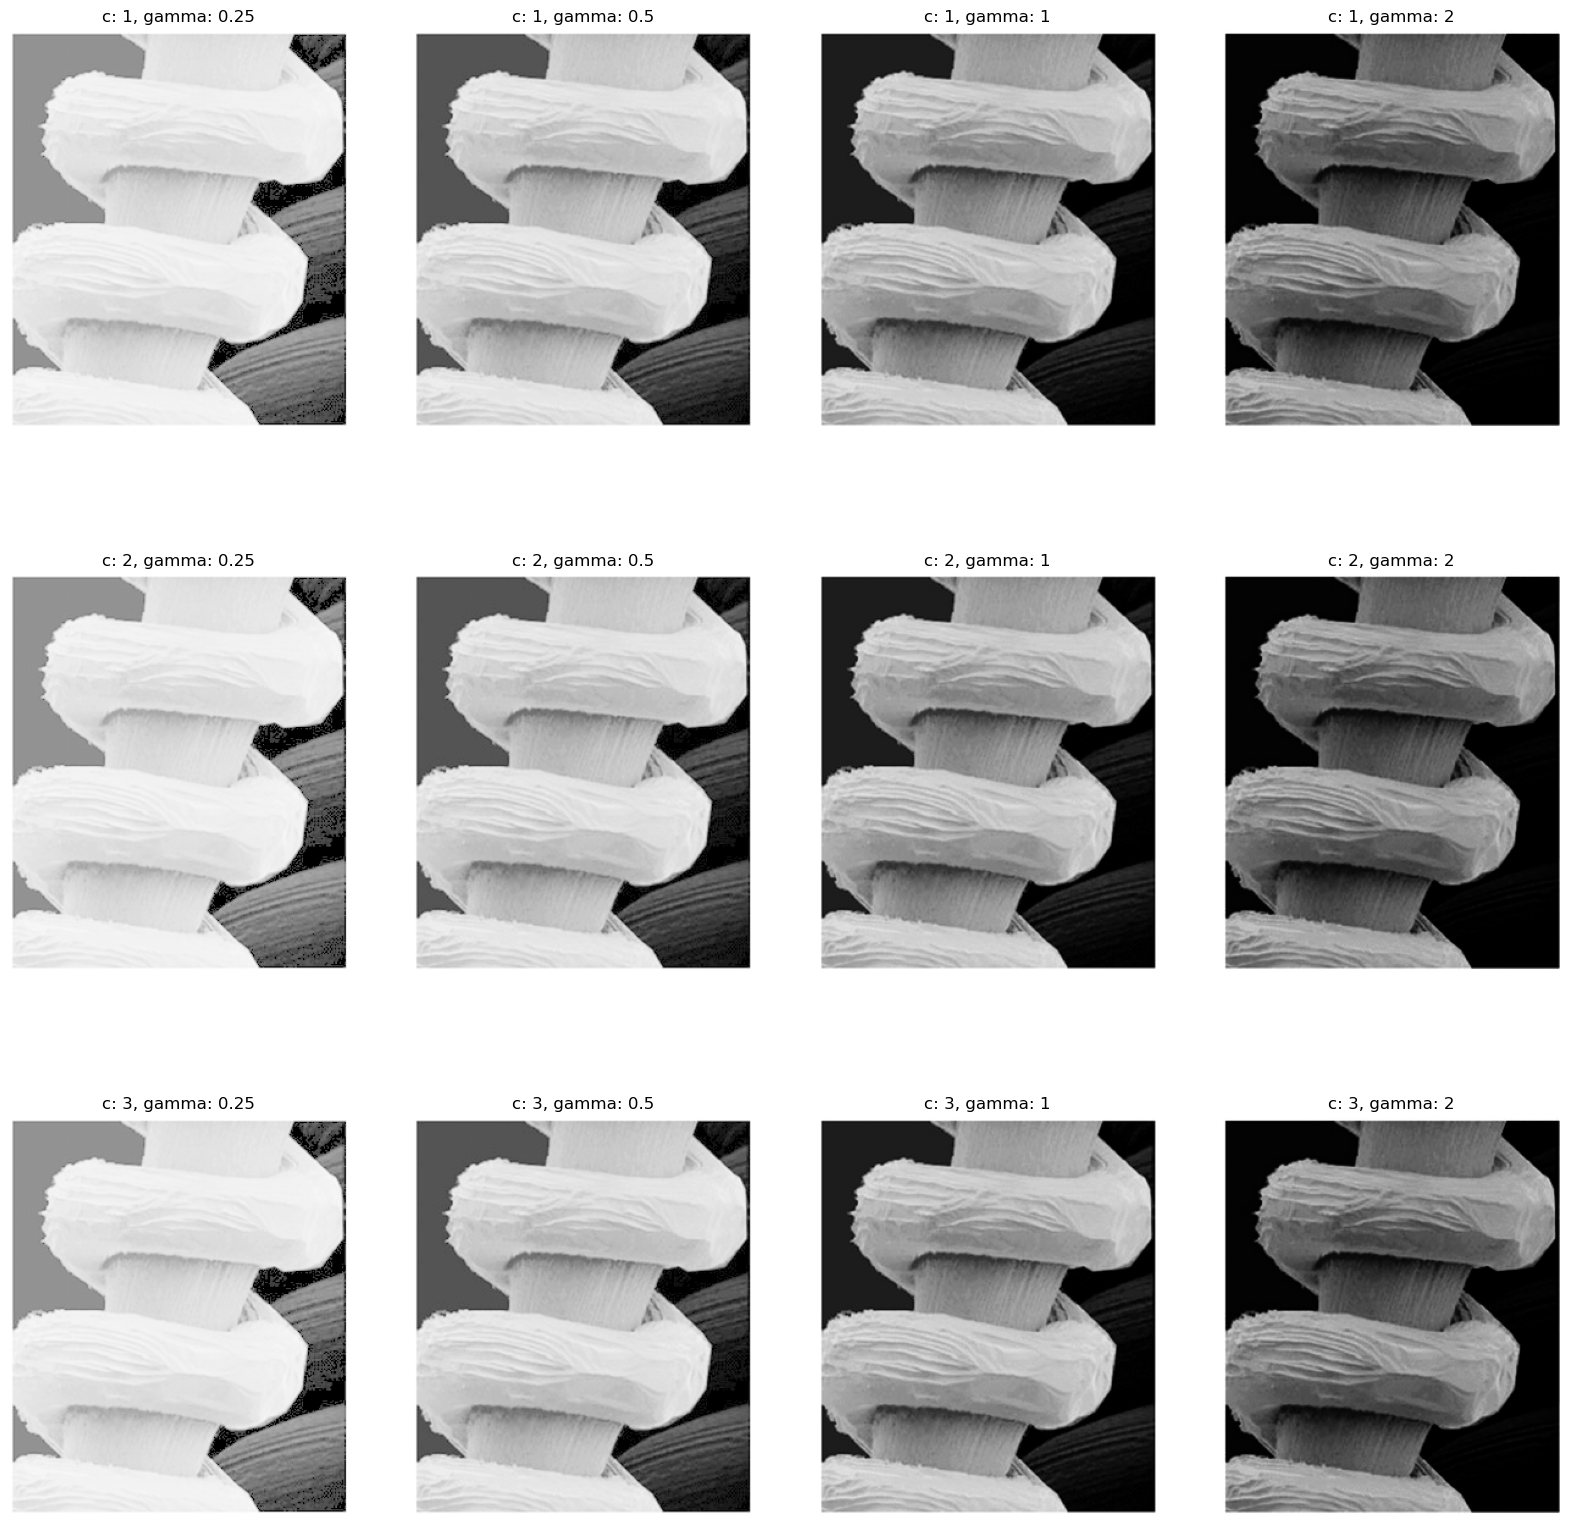

In [19]:
img_path = "./assignment2_image1.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

c_vals = [1, 2, 3]
gamma_vals = [0.25, 0.5, 1, 2]

row, col = len(c_vals), len(gamma_vals)
plt.figure(figsize=(20, 20))


# Apply gamma correction
for c in range(len(c_vals)):
    for gamma in range(len(gamma_vals)):
        c_val, gamma_val = c_vals[c], gamma_vals[gamma]
        img_corrected = gamma_correction(img, c_val, gamma_val)

        plt.subplot(row, col, c * col + gamma + 1)
        plt.imshow(img_corrected, cmap="gray")
        plt.axis("off")
        plt.title("c: {}, gamma: {}".format(c_val, gamma_val))

# Image enhancement with Global Histogram Equalization

In [20]:
def globalHistogramEqualiztion(img):

    # Calculate the histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    # Calculate the cumulative sum
    cdf = hist.cumsum()

    # Normalize the cdf
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Calculate the new pixel values
    img_new = cdf_normalized[img]

    return img_new

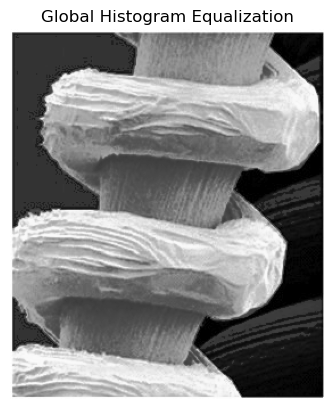

In [22]:
plt.imshow(globalHistogramEqualiztion(img), cmap="gray")
plt.axis("off")
plt.title("Global Histogram Equalization")
plt.show()